In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
min_max=False
standard=True
## 데이터 읽어오기.
df = pd.read_csv("/content/drive/MyDrive/ClassRoom/202407렛유인딥러닝/dataset/house_price_of_unit_area.csv")

## key말고 해당하는 value값만 추출해서 입력과 정갑 데이터 분류
dataset = df.values

In [3]:
df.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
x_data = df.copy()
y_data = x_data.pop('house price of unit area')

In [5]:
# 전체 데이터에서 학습 데이터와 검증, 테스트 데이터로 구분
X_train1, X_test, Y_train1, Y_test =train_test_split(x_data, y_data, test_size=0.3, shuffle=True)
X_train, X_valid, Y_train, Y_valid =train_test_split(X_train1, Y_train1, test_size=0.3, shuffle=True)

In [8]:
# 모델의 설정
activation=tf.keras.activations.sigmoid
input_Layer = tf.keras.layers.Input(shape=(5,))
x = tf.keras.layers.Dense(120, activation=activation)(input_Layer)
x= tf.keras.layers.Dense(100, activation=activation)(x)
x= tf.keras.layers.Dense(100, activation=activation)(x)
Out_Layer= tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_4 (Dense)             (None, 120)               720       
                                                                 
 dense_5 (Dense)             (None, 100)               12100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23021 (89.93 KB)
Trainable params: 23021 (89.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss=tf.keras.losses.mean_squared_error,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

result=model.fit(X_train, Y_train, epochs=800, batch_size=100, validation_data=(X_valid,Y_valid))
## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 알 수 있다.
print(result.history.keys())

Epoch 1/800
3/3 [==============================] - 1s 135ms/step - loss: 1325.9369 - root_mean_squared_error: 36.4134 - val_loss: 328.3066 - val_root_mean_squared_error: 18.1192
Epoch 2/800
3/3 [==============================] - 0s 27ms/step - loss: 259.4897 - root_mean_squared_error: 16.1087 - val_loss: 179.9075 - val_root_mean_squared_error: 13.4130
Epoch 3/800
3/3 [==============================] - 0s 19ms/step - loss: 162.1153 - root_mean_squared_error: 12.7325 - val_loss: 179.5309 - val_root_mean_squared_error: 13.3989
Epoch 4/800
3/3 [==============================] - 0s 16ms/step - loss: 162.3165 - root_mean_squared_error: 12.7403 - val_loss: 417.7029 - val_root_mean_squared_error: 20.4378
Epoch 5/800
3/3 [==============================] - 0s 17ms/step - loss: 256.5416 - root_mean_squared_error: 16.0169 - val_loss: 239.1209 - val_root_mean_squared_error: 15.4635
Epoch 6/800
3/3 [==============================] - 0s 17ms/step - loss: 189.2828 - root_mean_squared_error: 13.7580 - 

4/4 [==============================] - 0s 3ms/step - loss: 225.5502 - root_mean_squared_error: 15.0183

 Test rmse: 15.0183


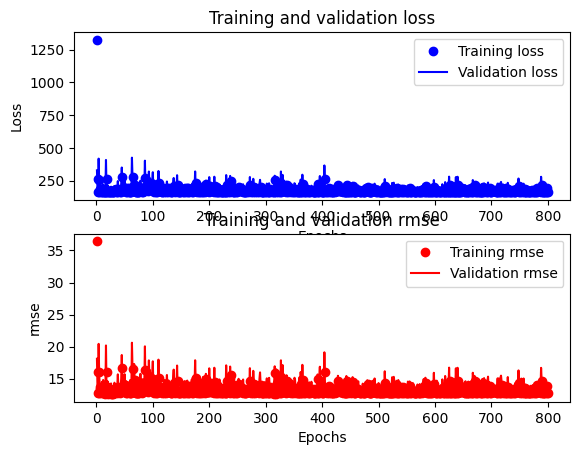

In [10]:
### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
val_loss = result.history['val_loss']

### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 root_mean_squared_error val_root_mean_squared_error key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
val_rmse = result.history['val_root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### mean_absolute_error val_mean_absolute_error key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.title('Training and validation rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(X_test, Y_test)[1]))

plt.show()